**Gesture Recognizer**

In [1]:
#import plotly.plotly as pl
import glob
import os
import math
from datapath import *

Gesture_Files = glob.glob(DATAPATH)

def get_line_list(csv_file):
    list_of_lines = [line.rstrip() for line in open(csv_file)]
    list_of_attributes = [attribute.strip() for attribute in list_of_lines[0].split(',')]
    rows = []
    for line in list_of_lines[1:]:
        r = [entry.strip() for entry in line.split(',')] 
        rows.append(r)
    return rows

def add_cols(rows, label, file_num):
    for index in range(len(rows)):
        del rows[index][1]
        del rows[index][1]
        
        rows[index][1] = float(rows[index][1])
        rows[index][2] = float(rows[index][2])
        rows[index][3] = float(rows[index][3])
        
        x = rows[index][1]
        y = rows[index][2]
        z = rows[index][3]
        
        rows[index].append(math.sqrt(x**2+y**2+z**2))
        rows[index].append(index)
        rows[index].append(file_num)
        rows[index].append(label)
      
    return rows

def func(Gesture_Files):
    All_Files = [] #a huge list contains everything
    for csv_file in Gesture_Files:
        rows = get_line_list(csv_file)
        label = os.path.basename(csv_file).split("_")[0]
        file_num = os.path.basename(csv_file)[-17:].split(".")[0]
        new_rows = add_cols(rows, label, file_num)
        All_Files.append(new_rows)
    return All_Files

All_Files = func(Gesture_Files)


Here are the plots that plot x, y, z, magnitude (respectively) versus time respectively for every gesture.
For further analysis, see report.

100


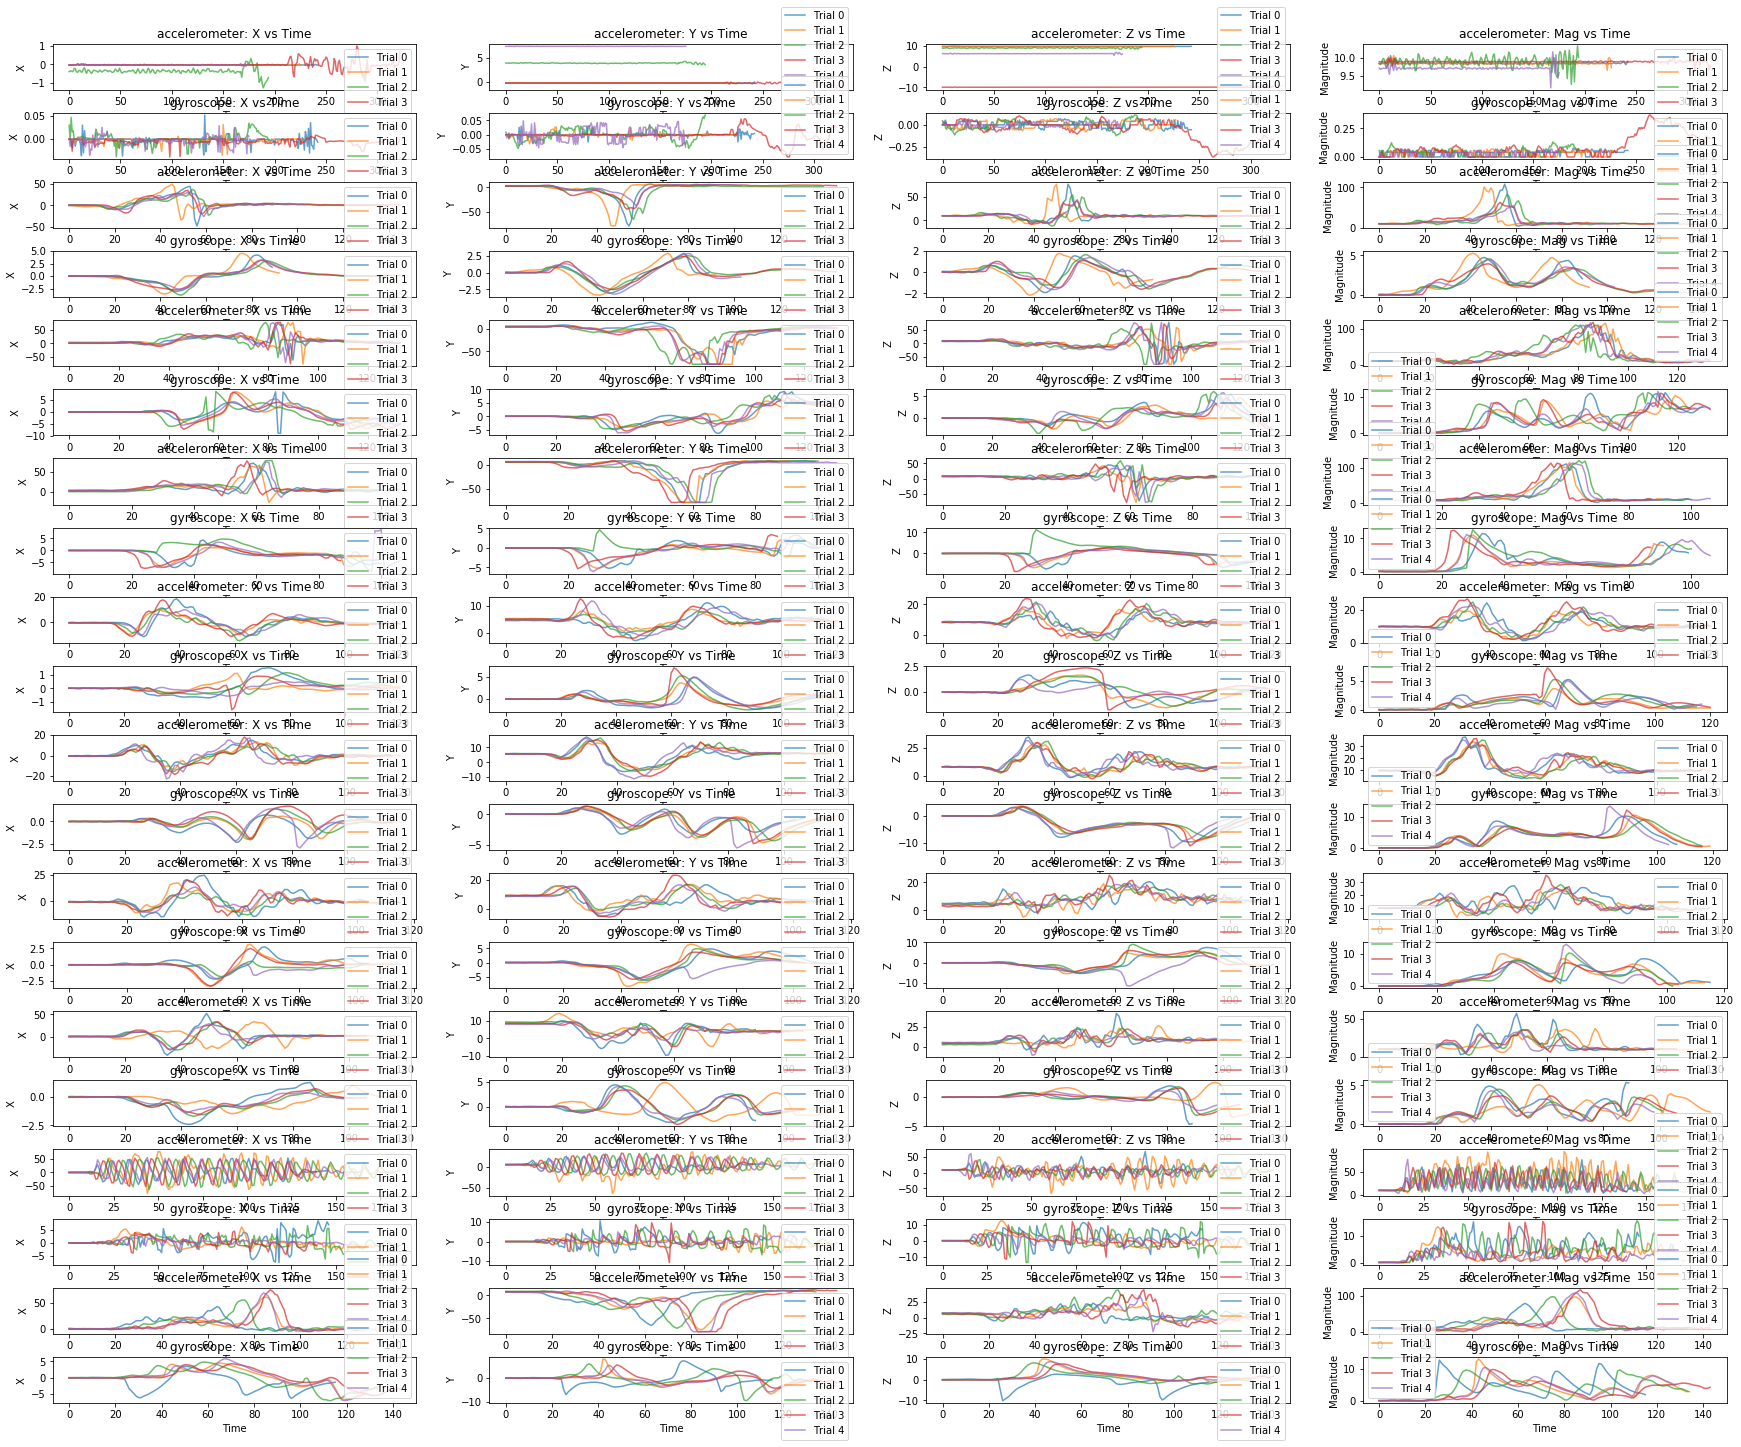

In [3]:
import matplotlib.pyplot as plt

def plot_3d(single_file):
    vector3 = []
    #for data_point in single_file:
    return

def get_X_Time(single_file):
    X = []
    Time = []
    for data_point in single_file:
        X.append(data_point[1])
        Time.append(data_point[-3])
    return (Time, X)

def get_Y_Time(single_file):
    Y = []
    Time = []
    for data_point in single_file:
        Y.append(data_point[2])
        Time.append(data_point[-3])
    return (Time, Y)

def get_Z_Time(single_file):
    Z = []
    Time = []
    for data_point in single_file:
        Z.append(data_point[3])
        Time.append(data_point[-3])
    return (Time, Z)

def get_Mag_Time(single_file):
    Mag = []
    Time = []
    for data_point in single_file:
        Mag.append(data_point[4])
        Time.append(data_point[-3])
    return (Time, Mag)


def draw_X_acc(Files, r, c):
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    fig.subplots_adjust(hspace=0.5)
    
    for index in range(len(Files)):
        somefile = Files[index]
        (Time, X) = get_X_Time(somefile)
        axes[r][c].plot(Time, X, alpha=0.7, label="Trial {}".format(index))
        axes[r][c].set_title("x")
        axes[r][c].legend()
    return

def get_index_list():
    index_list = []
    for i in range(20):
        index_tuple = (i*5, (i+1)*5)
        index_list.append(index_tuple)
    return index_list

def draw_all(All_Files):
    #(0,5) (5,10) (10,15) ... (95,100)
    index_list = get_index_list()
    fig, axes = plt.subplots(20, 4, figsize=(30, 25))
    fig.subplots_adjust(hspace=0.5)
    
    for i in range(len(index_list)):
        Files = All_Files[index_list[i][0] : index_list[i][1]]
        (low, high)=index_list[i]
        #print(low, high)
        for index in range(len(Files)):
            somefile = Files[index]
            (Time0, X) = get_X_Time(somefile)
            (Time1, Y) = get_Y_Time(somefile)
            (Time2, Z) = get_Z_Time(somefile)
            (Time3, Mag) = get_Mag_Time(somefile)
            
            axes[i][0].plot(Time0, X, alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][0].set_title(title+"X vs Time")
            axes[i][0].set_xlabel('Time')
            axes[i][0].set_ylabel('X')
            axes[i][0].legend()
            
            
            axes[i][1].plot(Time1, Y, alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][1].set_title(title+"Y vs Time")
            axes[i][1].set_xlabel('Time')
            axes[i][1].set_ylabel('Y')
            axes[i][1].legend()
            
            
            axes[i][2].plot(Time2, Z, alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][2].set_title(title+"Z vs Time")
            axes[i][2].set_xlabel('Time')
            axes[i][2].set_ylabel('Z')
            axes[i][2].legend()
            
            axes[i][3].plot(Time3, Mag, alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][3].set_title(title+"Mag vs Time")
            axes[i][3].set_xlabel('Time')
            axes[i][3].set_ylabel('Magnitude')
            axes[i][3].legend()
       
    return

print(len(All_Files))
draw_all(All_Files)
        

Here is the frequency analysis. Each subdiagram represents x, y, z, magnitude (respectively) converted by fourier transformation versus time. For further analysis, see report.

/Users/zhuonama/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


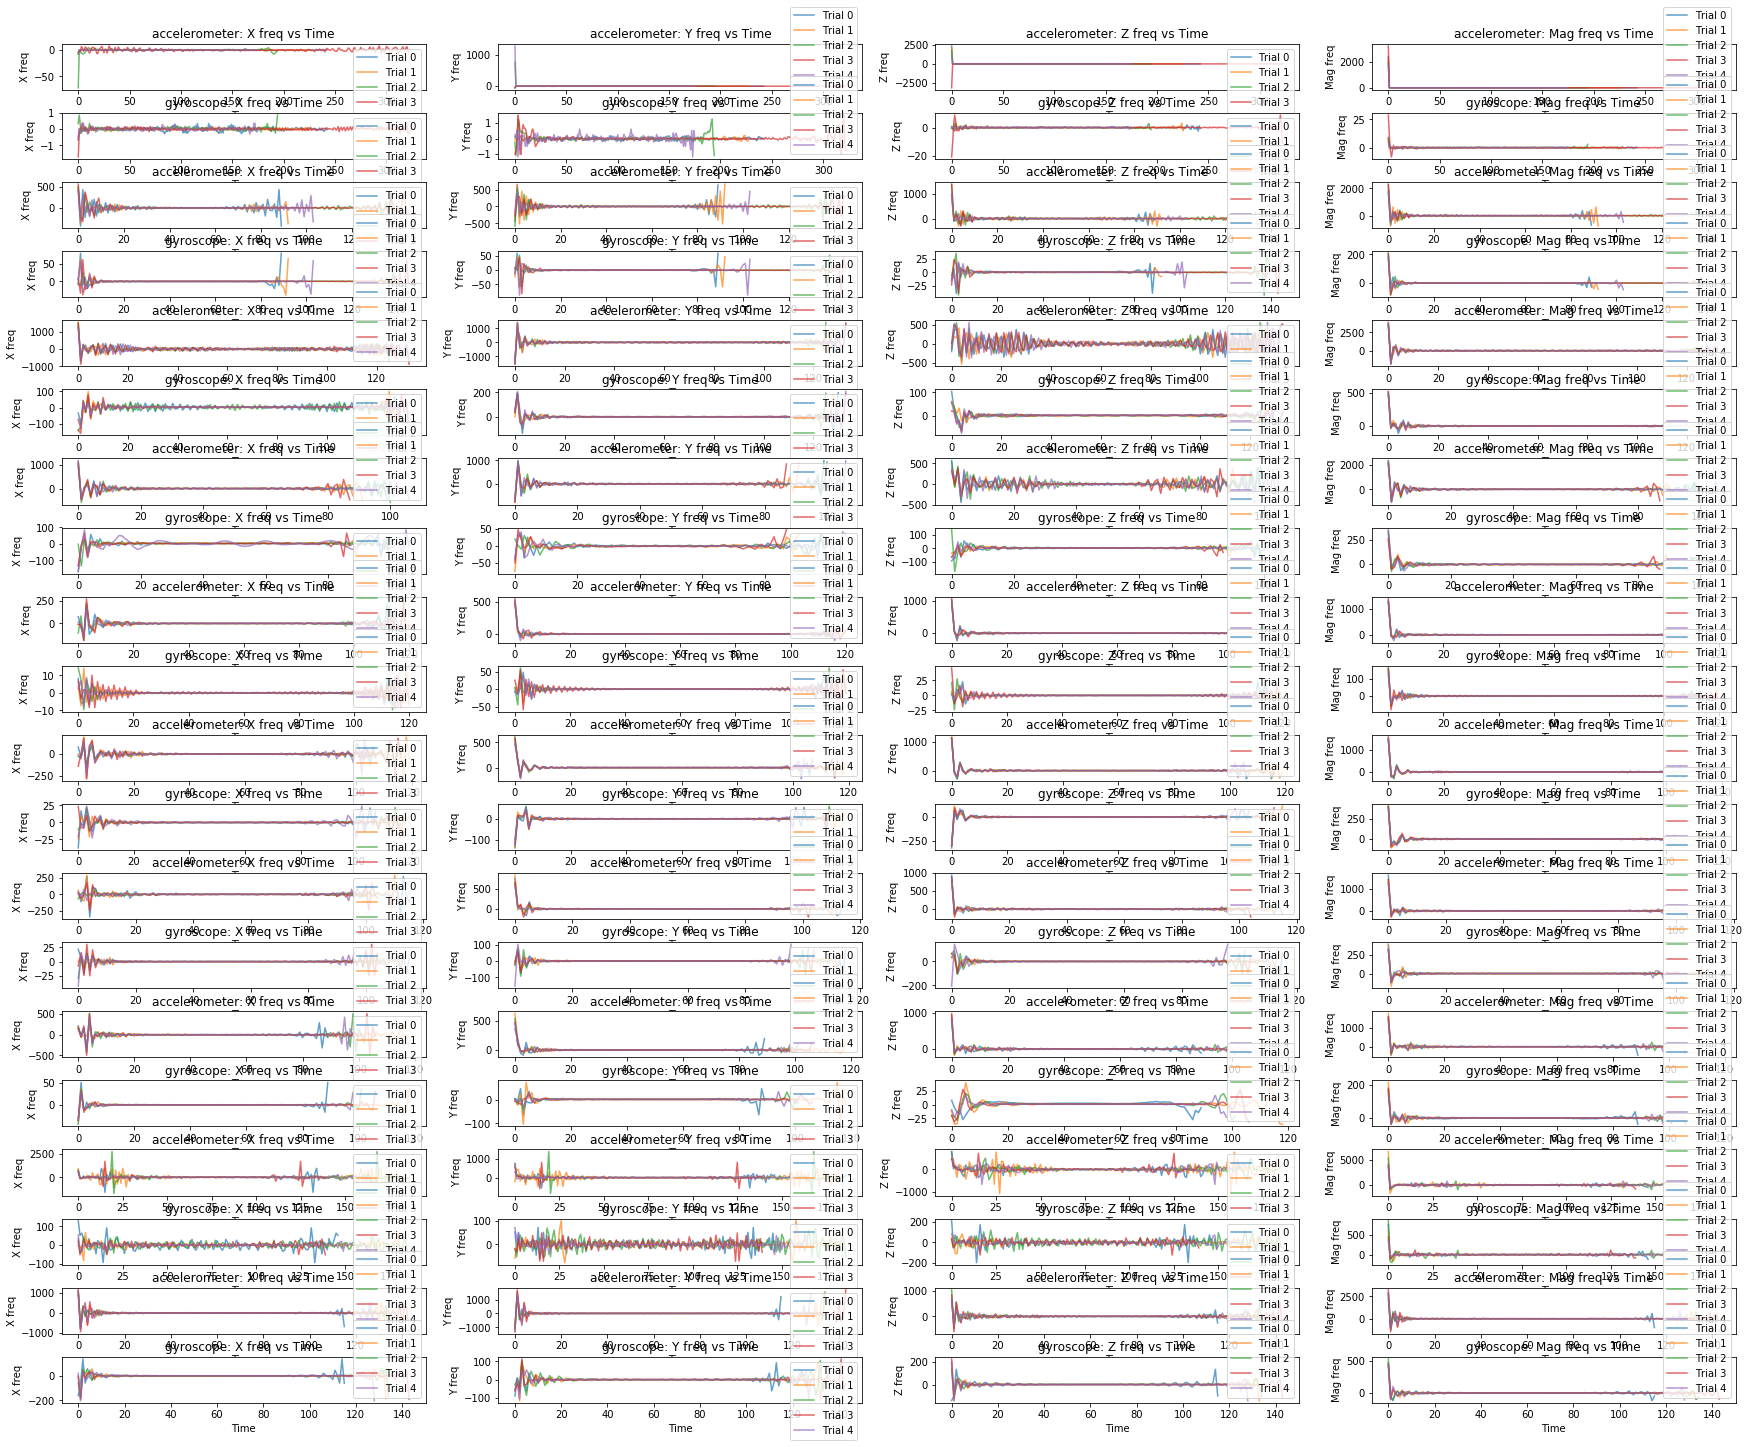

In [4]:
from scipy.fftpack import fft

def draw_all_fft(All_Files):
    #(0,5) (5,10) (10,15) ... (95,100)
    index_list = get_index_list()
    fig, axes = plt.subplots(20, 4, figsize=(30, 25))
    fig.subplots_adjust(hspace=0.5)
    
    for i in range(len(index_list)):
        Files = All_Files[index_list[i][0] : index_list[i][1]]
        (low, high)=index_list[i]
        
        for index in range(len(Files)):
            somefile = Files[index]
            (Time0, X) = get_X_Time(somefile)
            (Time1, Y) = get_Y_Time(somefile)
            (Time2, Z) = get_Z_Time(somefile)
            (Time3, Mag) = get_Mag_Time(somefile)
            
            axes[i][0].plot(Time0, fft(X), alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][0].set_title(title+"X freq vs Time")
            axes[i][0].set_xlabel('Time')
            axes[i][0].set_ylabel('X freq')
            axes[i][0].legend()
            
            axes[i][1].plot(Time1, fft(Y), alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][1].set_title(title+"Y freq vs Time")
            axes[i][1].set_xlabel('Time')
            axes[i][1].set_ylabel('Y freq')
            axes[i][1].legend()
            
            axes[i][2].plot(Time2, fft(Z), alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][2].set_title(title+"Z freq vs Time")
            axes[i][2].set_xlabel('Time')
            axes[i][2].set_ylabel('Z freq')
            axes[i][2].legend()
            
            axes[i][3].plot(Time3, fft(Mag), alpha=0.7, label="Trial {}".format(index))
            if i%2 == 0:
                title = "accelerometer: "
            else:
                title = "gyroscope: "
            axes[i][3].set_title(title+"Mag freq vs Time")
            axes[i][3].set_xlabel('Time')
            axes[i][3].set_ylabel('Mag freq')
            axes[i][3].legend()
            
    return

draw_all_fft(All_Files)

The block below is the preprocessing for ml algo's
I took 32 features into consideration, the average/min/max/standard deviation for magnitude/x/y/z detected by accelerometer/gyroscope.

In [2]:
import numpy as np
class gesture:
    def __init__(self, label, num, f_acc, f_gyro):
        self.label = label #which gesture
        self.num = num #which trial
        self.f_acc = f_acc
        self.f_gyro = f_gyro
        self.f_all = self.f_acc + self.f_gyro
        
Gestures = []

def preprocess(single_file):
    f = [0]*16
    numpy_file = np.array(single_file)  #convert the file to a 2d numpy array
    x = numpy_file[:,1].astype(np.float)
    y = numpy_file[:,2].astype(np.float)
    z = numpy_file[:,3].astype(np.float)
    mag = numpy_file[:,4].astype(np.float)
    
    f[0] = np.average(mag)
    f[1] = np.max(mag)
    f[2] = np.min(mag)
    f[3] = np.std(mag)
    
    f[4] = np.average(x)
    f[5] = np.max(x)
    f[6] = np.min(x)
    f[7] = np.std(x)

    f[8] = np.average(y)
    f[9] = np.max(y)
    f[10] = np.min(y)
    f[11] = np.std(y)
    
    f[12] = np.average(z)
    f[13] = np.max(z)
    f[14] = np.min(z)
    f[15] = np.std(z)
    
    return f

def get_IDs(File_Names):
    IDs = set()
    for file_name in File_Names:
        IDs.add(file_name[-17:-4])
    return IDs

IDs = get_IDs(Gesture_Files)

def generate_gesture(All_Files, ID):
    acc_file = 2000
    gyro_file = 3000
    for file in All_Files:
        if file[0][-2] == ID and file[0][0] == 'android.sensor.accelerometer':
            acc_file = file
        if file[0][-2] == ID and file[0][0] != 'android.sensor.accelerometer':
            gyro_file = file
    label = acc_file[0][-1]
    num = ID
    f_acc = preprocess(acc_file)
    f_gyro = preprocess(gyro_file)
    ges = gesture(label, num, f_acc, f_gyro)  
    return ges

def generate_Gestures(All_Files, IDs):
    #for index in range(len(All_Files)):
        #here we got the features but not sure is gyro or acc
        #All_Files[index]
    ges_list = []
    for ID in IDs:
        ges = generate_gesture(All_Files, ID)
        ges_list.append(ges)
    return ges_list

Ges_List = generate_Gestures(All_Files, IDs)
print("Done")
    

Done


The block below applies Support Vector Machine on the features described beforehand.
I imported the k-fold algo from sklearn library.
Note that if you want to run this on your own laptop, the folds will change and you'll have to inspect and interpret the confusion matrix on your own rather than looking at my printed results.

In [4]:
#Applies svm with kfolds validation
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def svm_get_X(Ges_List):
    X = [ges.f_all for ges in Ges_List]
    return X
X_svm = svm_get_X(Ges_List)

def svm_get_y(Ges_List):
    y = [ges.label for ges in Ges_List]
    return y
y_svm = svm_get_y(Ges_List)

#svm_predictions = svm_model.predict(X_test_svm)
#svm_accuracy_score = svm_model.score(X_test_svm, y_test_svm) 
#svm_cm = confusion_matrix(y_test_svm, svm_predictions)


#print(svm_predictions)
#print(svm_accuracy_score)
#print(svm_cm)

def individual_train_predict(X_svm, y_svm, i):
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, random_state = i)
    svm_model = SVC(kernel = 'linear', C=1).fit(X_train_svm, y_train_svm)

    svm_predictions = svm_model.predict(X_test_svm)
    svm_accuracy_score = svm_model.score(X_test_svm, y_test_svm) 
    svm_cm = confusion_matrix(y_test_svm, svm_predictions)
    #print(svm_cm)
    #print(svm_cm.ravel())
    return (y_test_svm, svm_predictions, svm_accuracy_score, svm_cm)

#individual_train_predict(X_svm, y_svm, i)

def interpret_cm(CMs):
    print("(iii) By manually inspecting the confusion matrices, At Rest has 87.5% accuracy; other gestures have 100% accuracy.")
def train_predict_svm(Ges_List):
    X_svm = svm_get_X(Ges_List)
    y_svm = svm_get_y(Ges_List)
    
    Tests = []
    Preds = []
    Scores = []
    CMs = []
    for i in range(5):
        result = individual_train_predict(X_svm, y_svm, i)
        Tests.append(result[0])
        Preds.append(result[0])
        Scores.append(result[2])
        CMs.append(result[3])
        
    print("(i)Overall Accuracy Scores: ", sum(Scores)/5) 
    #print(Preds)
    #print(Tests)
    interpret_cm(CMs)
    print("(iii)Confusion Matrix for each fold: ", CMs)
    return

train_predict_svm(Ges_List)

(i)Overall Accuracy Scores:  0.9846153846153847
(iii) By manually inspecting the confusion matrices, At Rest has 87.5% accuracy; other gestures have 100% accuracy.
(iii)Confusion Matrix for each fold:  [array([[3, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 3]]), array([[2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]]), array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0,

The following block is a implementation of knn that uses dtw as a measure of distance
For each unknown data point, I computed the dtw distance of its features to the features of every other data point in the training set; then I tried to find the smallest without doing a majority vote because the variance for distances is large, i.e. it would be obvious to categorize a data point.
The k-folds algo is imported from sklearn.
Note that if you want to run this on your own laptop, the folds will change and you'll have to inspect and interpret the confusion matrix on your own rather than looking at my printed results.

In [8]:
#dtw is not a ml model; it just computes the "distance" from a set of features to another
#implemented a model from scratch that applies similar idea to knn but uses dtw
#kfold validation included

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

#for a specific unknown input
def get_individual_dtw(X2_train, X2_test, y2_train, y2_test, test_index):
    unknown_tuple = (X2_test[test_index],y2_test[test_index])
    c_num = len(y2_train)
    r_num = len(y2_test)
    
    dist_list = []
    for i in range(c_num):
        distance, path = fastdtw(unknown_tuple[0], X2_train[i], dist=euclidean)
        dist_list.append((distance,y2_train[i]))
    
    ######################################start making predictions
    
    sorted_dist_list = sorted(dist_list,key=lambda l:l[0])
    
    #if k = 1 (here k is parallel to the k in KNN) then we don't take a majority vote
    #append unknown's num + unknown's predicted label
    dist_list.append((test_index, sorted_dist_list[0][-1]))
    
    #append unknown's num + unknown's true label
    dist_list.append((test_index, unknown_tuple[-1]))
    
    return (dist_list[-2], dist_list[-1])

def get_all_dtw_one_fold(X2, y2, i):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = i)
    #each row: keep track of the distance to other known data points
    #all rows represent a collection of the unknown data points 
    c_num = len(y2_train)
    r_num = len(y2_test)

    Results = []
    
    #for every test data point
    for test_index in range(r_num):
        result =list(get_individual_dtw(X2_train, X2_test, y2_train, y2_test, test_index))
        Results.append(result)
        
    return Results

X2 = [ges.f_all for ges in Ges_List]
y2 = [ges.label for ges in Ges_List]

def get_all_dtw_all_folds(X2,y2):
    All_Results = []
    for i in range(5):
        Result_one_fold = get_all_dtw_one_fold(X2, y2, i)
        All_Results.append(Result_one_fold)
    #print(All_Results)
    return All_Results

All_Results = get_all_dtw_all_folds(X2, y2)
print("In")
print(All_Results)
print("Done")

In
[[[(0, 'Baseball Throw'), (0, 'Shake')], [(1, 'Underhand Bowling'), (1, 'Underhand Bowling')], [(2, 'Midair S'), (2, 'Midair S')], [(3, 'Midair S'), (3, 'Midair S')], [(4, 'Midair Counter Clockwise O'), (4, 'Midair Counter Clockwise O')], [(5, 'At Rest'), (5, 'At Rest')], [(6, 'Shake'), (6, 'Shake')], [(7, 'Midair Clockwise O'), (7, 'Midair Clockwise O')], [(8, 'Underhand Bowling'), (8, 'Underhand Bowling')], [(9, 'At Rest'), (9, 'At Rest')], [(10, 'Midair Counter Clockwise O'), (10, 'Midair Counter Clockwise O')], [(11, 'Underhand Bowling'), (11, 'Underhand Bowling')], [(12, 'Shake'), (12, 'Shake')]], [[(0, 'At Rest'), (0, 'At Rest')], [(1, 'Underhand Bowling'), (1, 'Underhand Bowling')], [(2, 'Backhand Tennis'), (2, 'Backhand Tennis')], [(3, 'Shake'), (3, 'Shake')], [(4, 'Midair Counter Clockwise O'), (4, 'Midair Counter Clockwise O')], [(5, 'At Rest'), (5, 'At Rest')], [(6, 'Midair S'), (6, 'Midair S')], [(7, 'Underhand Bowling'), (7, 'Underhand Bowling')], [(8, 'Baseball Throw')

In [21]:
#dtw continued
#now check measurements

def get_accuracy_score(All_Results):
    total_num = len(All_Results[0]) * 5
    false_num = 0
    for i in range(5):
        for j in range(len(All_Results[0])):
            if All_Results[i][j][0] != All_Results[i][j][1]:
                false_num+=1
    accuracy_score = (total_num-false_num)/total_num
    print("(i)The overall accuracy score is: " + str(accuracy_score))
    return accuracy_score
    
get_accuracy_score(All_Results)

def preprocess_for_cm(All_Results):
    Preds = []
    Truth = []
    for i in range(5):
        for j in range(len(All_Results[0])):
            Preds.append(All_Results[i][j][0][-1])
            Truth.append(All_Results[i][j][-1][-1])
    #print(Preds, Truth)
    return (Preds, Truth)

Preds, Truth = preprocess_for_cm(All_Results)

def get_confusion_matrix(Preds, Truth):
    cm = confusion_matrix(Truth, Preds)
    print("(iii)The confusion matrix is: ", cm)
    return

get_confusion_matrix(Preds, Truth)

print("(ii)By inspecting the confusion matrix, 4 Shakes are misinterpreted as Baseball Throw, 1 Midair S is misinterpreted as Midair Counter Clockwise O.",
     "So for Baseball throw, the accuracy rate is 55.56%, for Midair S, the accuracy score is 87.5%.",
     "Other gestures all have 100% accuracy score.")
    

(i)The overall accuracy score is: 0.9230769230769231
(iii)The confusion matrix is:  [[7 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 1 7 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 4 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 8]]
(ii)By inspecting the confusion matrix, 4 Shakes are misinterpreted as Baseball Throw, 1 Midair S is misinterpreted as Midair Counter Clockwise O. So for Baseball throw, the accuracy rate is 55.56%, for Midair S, the accuracy score is 87.5%. Other gestures all have 100% accuracy score.
